# Differentialgleichungen

## Übungsblatt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


### Aufgabe 1: Newton Cooling

Ein Objekt mit Temperatur $T_0$ zum Zeitpunkt $t=0$ wird auf die Umgebungstemperatur $T_U$ abgekühlt (oder erhitzt). Unter bestimmten
physikalischen Voraussetzungen ist die Temperatur $T(t)$ als Funktion der Zeit $t$ durch die folgende Differentialgleichung
gegeben ([Newtonsches Abkühlungsgesetz](https://en.wikipedia.org/wiki/Newton's_law_of_cooling)):

$$ \frac{dT}{dt} = -k \left(T - T_U\right) $$

Die positive Konstante $k$ heisst *Wärmeleitfähigkeit* und hat die Einheit einer Rate $[k]=s^{-1}$. Je grösser $k$, desto schneller kühlt das Objekt ab.

Die allgemeine Lösung dieser Differentialgleichung ist:

$$ T(t) = T_U + C e^{-k t} $$

Ein Objekt sei zu Beginn 100 °C warm und wird dann bei Raumtemperatur (20 °C) abkühlt.
- Anfangsbedingung: $T(0) = T_0 = 100$
- Umgebungstemperatur: $T_U = 20$

$$
    100 = T(0)
    = 20 + C e^{-k \cdot 0}
    = 20 + C
    \quad\Rightarrow\quad
    C = 100 - 20 = 80
    \quad\Rightarrow\quad
    T(t) = 20 + 80 e^{-k t}
$$

oder allgemein:

$$ 
    T_0 = T(0)
    = T_U + C e^{-k \cdot 0}
    = T_U + C
    \quad\Rightarrow\quad
    T(t) = T_U + (T_0 - T_U) e^{-k t}
$$

#### a) Analytische Lösung für unterschiedliche Werte von $k$

Zuerst soll die analytische Lösung $T(t) = 20 + 80e^{-kt}$ für verschiedene Werte von $k$ dargestellt werden.

- Stelle den Verlauf der Temperatur für $k \in \{0.01, 0.05, 0.1, 0.2\}$ im Zeitraum $t \in [0, 60]$ im gleichen Diagramm dar (mit Legende).

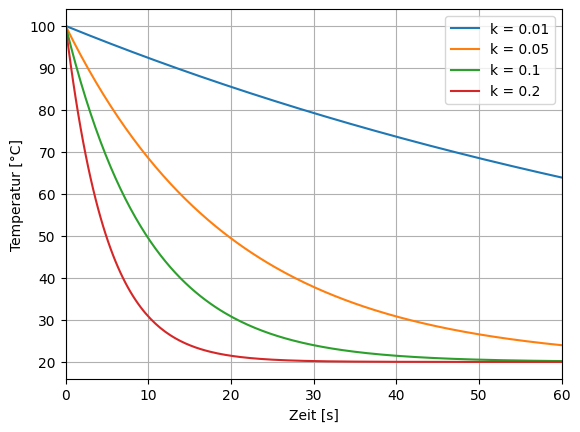

In [2]:
# Konstanten definieren
TU = 20
T0 = 100
ks = [0.01, 0.05, 0.1, 0.2]
t = np.linspace(0, 60, 200)
# Funktion definieren
def newton_cooling(t, TU, T0, k):
    return TU + (T0 - TU) * np.exp(-k * t)
# Graphen erstellen
for k in ks:
    T = newton_cooling(t, TU, T0, k)
    plt.plot(t, T, label=f"k = {k}")
plt.xlabel("Zeit [s]")
plt.ylabel("Temperatur [°C]")
plt.xlim(t.min(), t.max())
plt.grid()
plt.legend()
plt.show()


#### b) Differentialgleichung numerisch lösen

Löse die Differentialgleichung mit Hilfe von `scipy.integrate.solve_ivp`.

$$ \frac{dT}{dt} = -k \left(T - T_U\right) $$

Schreibe dazu die Funktion `dTdt(t, T, k, TU)`, welche die Ableitung $dT/dt$ berechnet.

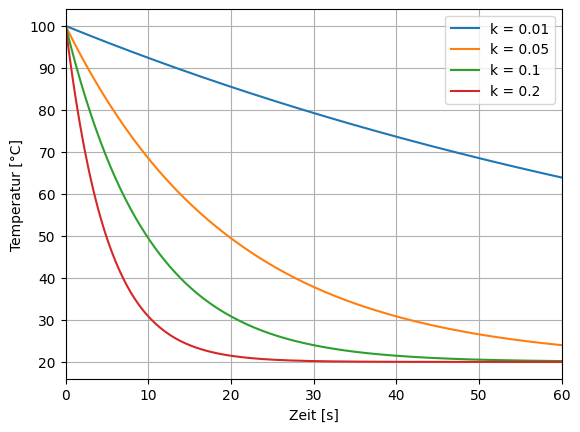

In [3]:
def dTdt(t, T, k, TU):
    return -k * (T - TU)
for k in ks:
    sol = solve_ivp(dTdt, [t.min(), t.max()], 
                    [T0], args=(k, TU), t_eval=t)
    plt.plot(sol.t, sol.y[0], label=f"k = {k}")
plt.xlabel("Zeit [s]")
plt.ylabel("Temperatur [°C]")
plt.xlim(t.min(), t.max())
plt.grid()
plt.legend()
plt.show()


#### c) Relativer Fehler

Plotte den relativen Fehler zwischen der analytischen Funktion und der numerischen Lösung der Differentialgleichung.

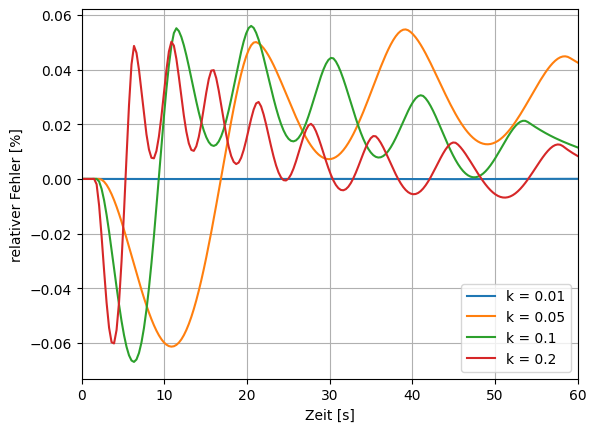

In [4]:
for k in ks:
    sol = solve_ivp(dTdt, [t.min(), t.max()], 
                    [T0], args=(k, TU), t_eval=t)
    T = newton_cooling(t, TU, T0, k)
    error_y = (sol.y[0] - T) / T * 100
    plt.plot(sol.t, error_y, label=f"k = {k}")

plt.xlabel("Zeit [s]")
plt.ylabel("relativer Fehler [%]")
plt.xlim(t.min(), t.max())
plt.grid()
plt.legend()
plt.show()


#### d) Einfluss der Wärmeleitfähigkeit

Beschreibe den Einfluss von $k$ auf die Abkühlung.

$k$ bestimmt die Geschwindigkeit, mit der die Temperaturdifferenz zwischen dem Objekt und der Umgebung abnimmt. Ein höherer Wert von $k$ bedeutet, dass die Wärmeleitung zwischen dem Objekt und der Umgebung effizienter ist, sodass das Objekt schneller abkühlt oder erwärmt. Ein niedriger Wert von $k$ bedeutet, dass die Wärmeleitung weniger effizient ist, wodurch der Temperaturausgleich zwischen dem Objekt und der Umgebung langsamer erfolgt.

### Aufgabe 2: Chemische Reaktion



Hier ist eine Kette von zwei chemischen Reaktionen beschrieben, die mithilfe von Differentialgleichungen modelliert werden können. Es gibt vier Differentialgleichungen für die vier beteiligten Stoffmengen $n_i$, gemessen in Mol. Die Reaktionsgeschwindigkeiten $n'_i$ sind jeweils proportional zu den Mengen der beteiligten Stoffe und einer Reaktionsrate $k_i$.

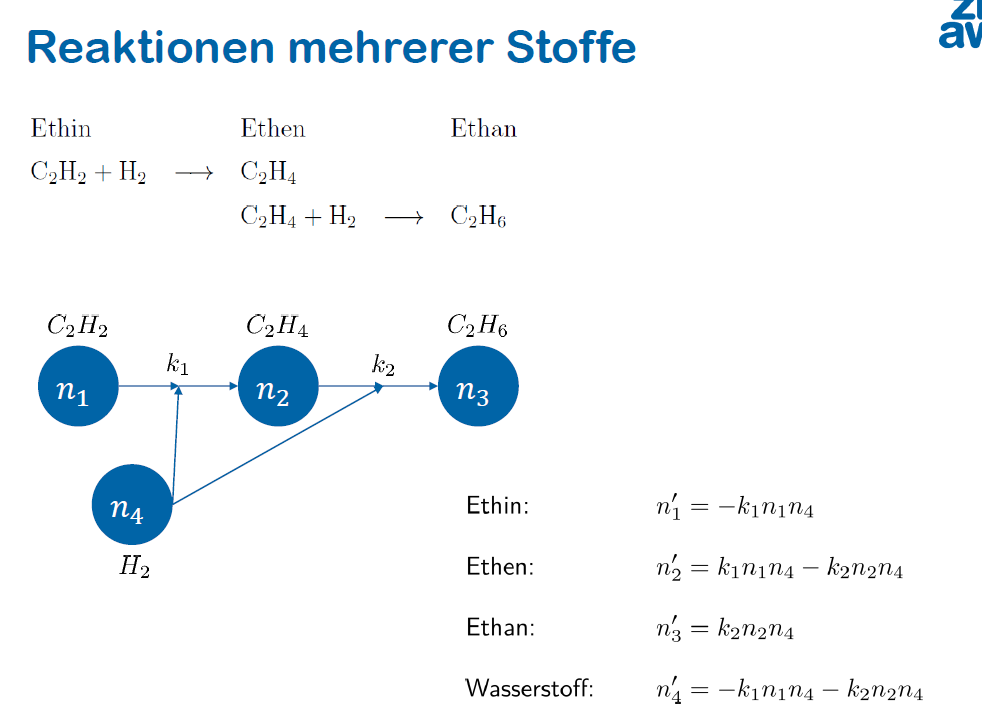

#### a) Reaktionsgleichung definieren

Schreibe eine Funktion `reaction(t, y, k1, k2)`, welche den Vektor der Ableitungen der beteiligten Stoffmengen zurückgibt. Hier ist `t`  die Zeit und `y` ein Array mit den Werten `n1`, `n2`, `n3` und `n4` zur Zeit `t`. Die Parameter `k1` und `k2` sind die Reaktionsraten.

In [5]:
def reaction(t, y, k1, k2):
    n1, n2, n3, n4 = y
    dn1 = -k1 * n1 * n4
    dn3 = k2 * n2 * n4
    dn2 = -dn1 - dn3
    dn4 = dn1 - dn3
    return np.array((dn1, dn2, dn3, dn4))


#### b) System von Differentialgleichungen numerisch lösen

Berechne und visualisiere die Lösung des Differentialgleichungssystems mithilfe von [scipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) im Bereich $t \in [0,100]$. Die Anfangsbedingungen seien

$$
    \begin{align*}
        n_1(0) &= 1 \,,&
        n_2(0) &= 0 \,,&
        n_3(0) &= 0 \,,&
        n_4(0) &= 0.8
    \end{align*}
$$

und wir nehmen mal $k_1 = 0.1$ und $k_2 = 0.05$.

Spiele mit den Parametern herum und versuche zu verstehen, was sie bewirken.

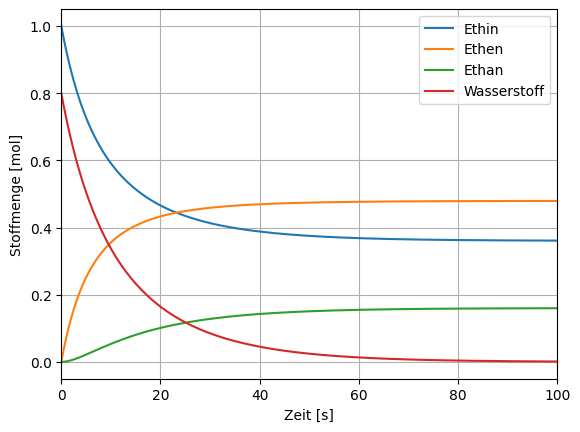

In [6]:
k1 = 0.1
k2 = 0.05
y0 = [1, 0, 0, 0.8]

t = np.linspace(0, 100, 200)
t_span = (t.min(), t.max())

sol = solve_ivp(reaction, t_span, y0, args=(k1, k2), t_eval=t)

plt.plot(t, sol.y.T, label=("Ethin", "Ethen", "Ethan", "Wasserstoff"))
plt.xlim(t_span)
plt.xlabel("Zeit [s]")
plt.ylabel("Stoffmenge [mol]")
plt.legend()
plt.grid()
plt.show()


#### c) Abhängigkeit des Reaktionsverlaufs von den Reaktionsraten

Stelle ein Diagramm mit 4 Subplots (2x2) her, in denen du die Lösung des Differentialgleichungssystems für alle Kombinationen von $k_1$ und $k_2$ darstellst:

- $k_1 \in \{0.1, 0.5\}$
- $k_2 \in \{0.05, 0.25\}$

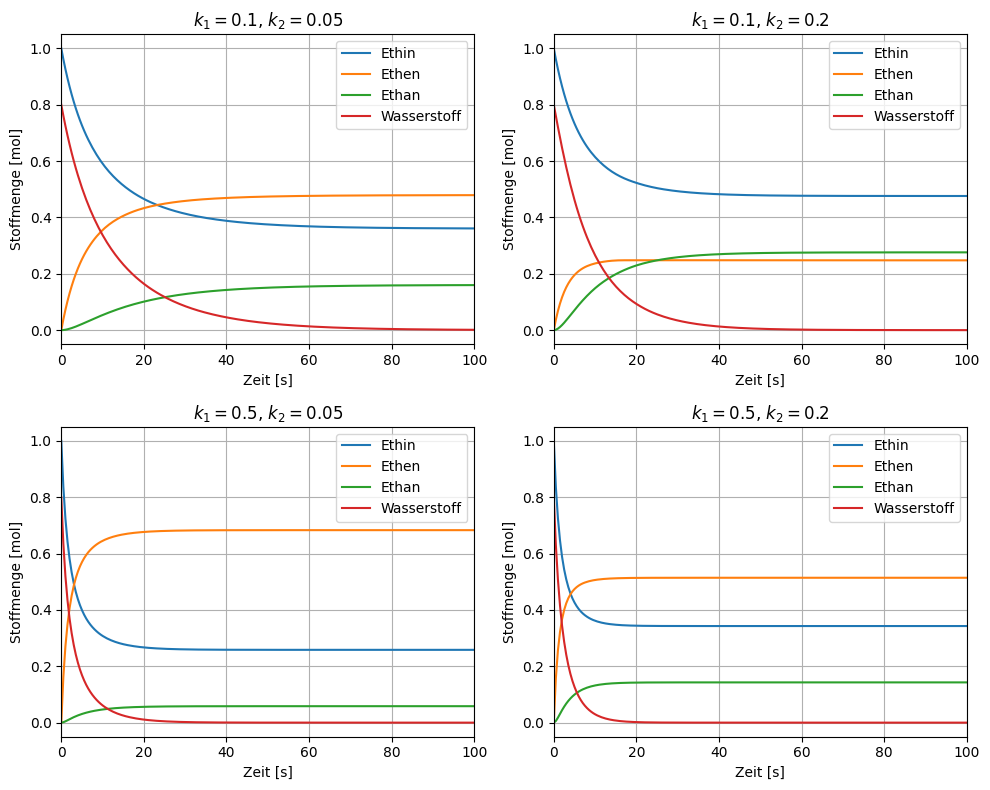

In [7]:
# Listen von k1 und k2
k1s = (0.1, 0.5)
k2s = (0.05, 0.2)

fig, axes = plt.subplots(len(k1s), len(k2s), figsize=(10, 8))

for i, k1 in enumerate(k1s):
    for j, k2 in enumerate(k2s):
        sol = solve_ivp(reaction, t_span, y0, args=(k1, k2), t_eval=t)
        ax = axes[i, j]
        ax.plot(t, sol.y.T, label=("Ethin", "Ethen", "Ethan", "Wasserstoff"))
        ax.set_xlim(t_span)
        ax.set_xlabel("Zeit [s]")
        ax.set_ylabel("Stoffmenge [mol]")
        ax.set_title(f"$k_1={k1}$, $k_2={k2}$")
        ax.legend()
        ax.grid()

plt.tight_layout()
plt.show()


#### d) Beschreibung der Reaktionsraten

Beschreibe in eigenen Worten die Auswirkung der Änderung von $k_1$ und $k_2$ auf die Veränderung der Stoffmengen bzw. den Verlauf.

Einfluss von $k_1$:

- Erhöhung von $k_1$ führt zu einer schnelleren Abnahme der Stoffmenge von $n_1$ (Ethin) und $n_4$ (Wasserstoff) und einer schnelleren Zunahme der Stoffmenge von $n_2$ (Ethen).
- Eine niedrigere Rate $k_1$ führt zu einer langsameren Reaktion, wodurch die Abnahme von $n_1$ und $n_4$ und die Zunahme von $n_2$ langsamer erfolgen.

Einfluss von $k_2$:

- Erhöhung von $k_2$ führt zu einer schnelleren Abnahme der Stoffmenge von $n_2$ (Ethen) und $n_4$ (Wasserstoff) und einer schnelleren Zunahme der Stoffmenge von $n_3$ (Ethan).
- Eine niedrigere $k_2$ führt zu einer langsameren Reaktion, wodurch die Abnahme von $n_2$ und $n_4$ und die Zunahme von $n_3$ langsamer erfolgen.

### Aufgabe 3: Räuber-Beute-Modell (Lotka-Volterra-Gleichungen)

Wir schauen uns hier das [Lotka-Volterra-Modell](https://de.wikipedia.org/wiki/Lotka-Volterra-Gleichungen) an. Es gibt sicher auf YouTube auch Videos dazu.

Es ist ein Populationsmodell für die Interaktion von Raubtieren und Beutetieren.

$$
\begin{align*}
    \frac{dN_1}{dt} &= a N_1 - b N_1 N_2 \\[1ex]
    \frac{dN_2}{dt} &= -c N_2 + d N_1 N_2
\end{align*}
$$


| Variable       | Bedeutung                                                                  | Typ          |
|----------------|----------------------------------------------------------------------------|--------------|
| $N_1 = N_1(t)$ | Anzahl der Beutelebewesen                                                  | zeitabhängig |
| $a > 0$        | Reproduktionsrate der Beute ohne Störung und bei grossem Nahrungsangebot   | konstant     |
| $b > 0$        | Fressrate der Räuber pro Beutelebewesen = Sterberate der Beute pro Räuber  | konstant     |
| $N_2 = N_2(t)$ | Anzahl der Räuber                                                          | zeitabhängig |
| $c > 0$        | Sterberate der Räuber, wenn keine Beute vorhanden ist                      | konstant     |
| $d > 0$        | Reproduktionsrate der Räuber pro Beutelebewesen                            | konstant     |

Im Wikipedia-Artikel sind die Parameter anders benannt $a=\epsilon_1$, $b=\gamma_1$, $c=\epsilon_2$ und $d=\gamma_2$.

#### a) Funktion für Lösung der Differentialgleichung definieren

Schreibe die Funktion `lotka_volterra(t, y, a, b, c, d)`, welche die rechte Seite des Differentialgleichungssystems für $t$ und $y=(N_1, N_2)$ berechnet.

In [8]:
def lotka_volterra(t, y, a, b, c, d):
    N1, N2 = y
    return np.array(
        (
            a * N1 - b * N1 * N2,
            -c * N2 + d * N1 * N2,
        )
    )


#### b) Lösung des Differentialgleichungssystems berechnen und plotten

Berechne die Lösung des Differentialgleichungssystems mit Hilfe von `scipy.integrate.solve_ivp` und plotte die Lösung mit 1000 Punkten im Bereich $t \in [0, 25]$.

Benutze dazu folgende Parameter-Werte und Anfangsbedingungen:

$$
\begin{align*}
    a &= 1 \,,&
    b &= 1.1 \,,&
    c &= 1.2 \,,&
    d &= 0.8 \,,&
    N_1(0) &= 1 \,,&
    N_2(0) &= 3
\end{align*}
$$


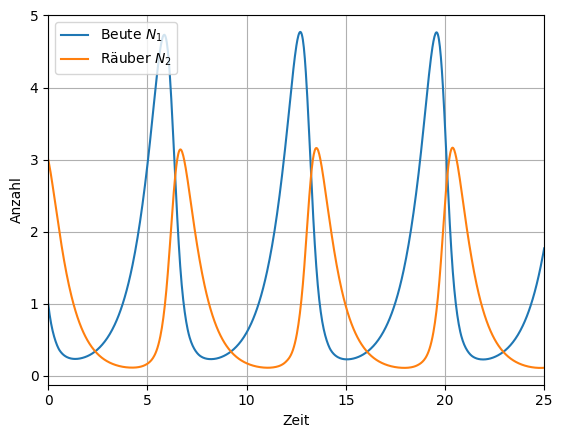

In [9]:
a = 1
b = 1.1
c = 1.2
d = 0.8
N1_0 = 1
N2_0 = 3

t = np.linspace(0, 25, 1000)
t_span = (t.min(), t.max())

sol = solve_ivp(
    lotka_volterra,
    t_span,
    y0=(N1_0, N2_0),
    args=(a, b, c, d),
    t_eval=t,
)
N1, N2 = sol.y

plt.plot(t, N1, label="Beute $N_1$")
plt.plot(t, N2, label="Räuber $N_2$")
plt.xlim(t_span)
plt.xlabel("Zeit")
plt.ylabel("Anzahl")
plt.legend()
plt.grid()
plt.show()


#### c) Phasenporträt

Plotte das Phasenporträt der Lösung des Räuber-Beute-Modells. Das heisst, stelle $N_1$ auf der $x$-Achse und $N_2$ auf der $y$-Achse dar.

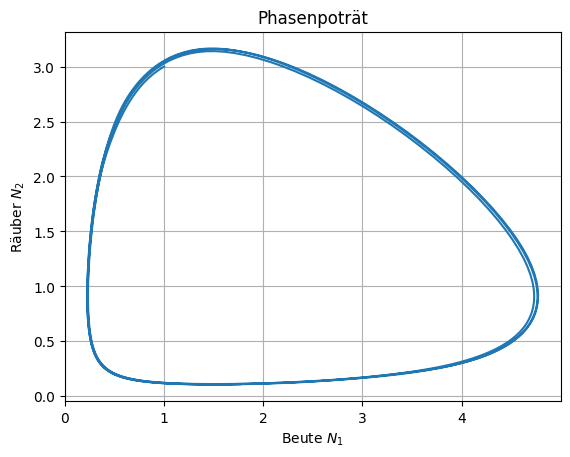

In [10]:
plt.plot(N1, N2)
plt.xlabel("Beute $N_1$")
plt.ylabel("Räuber $N_2$")
plt.title("Phasenpoträt")
plt.grid()
plt.show()


#### d) Abhängigkeit von Anfangswerten und/oder Modellparametern

Plotte das Phasenporträt der Lösung des Räuber-Beute-Modells für unterschiedliche Anfangswerte oder andere Werte der Modellparameter. Es ist dir überlassen, was du änderst. Überlege dir, was die Veränderung für das Modell bedeutet.

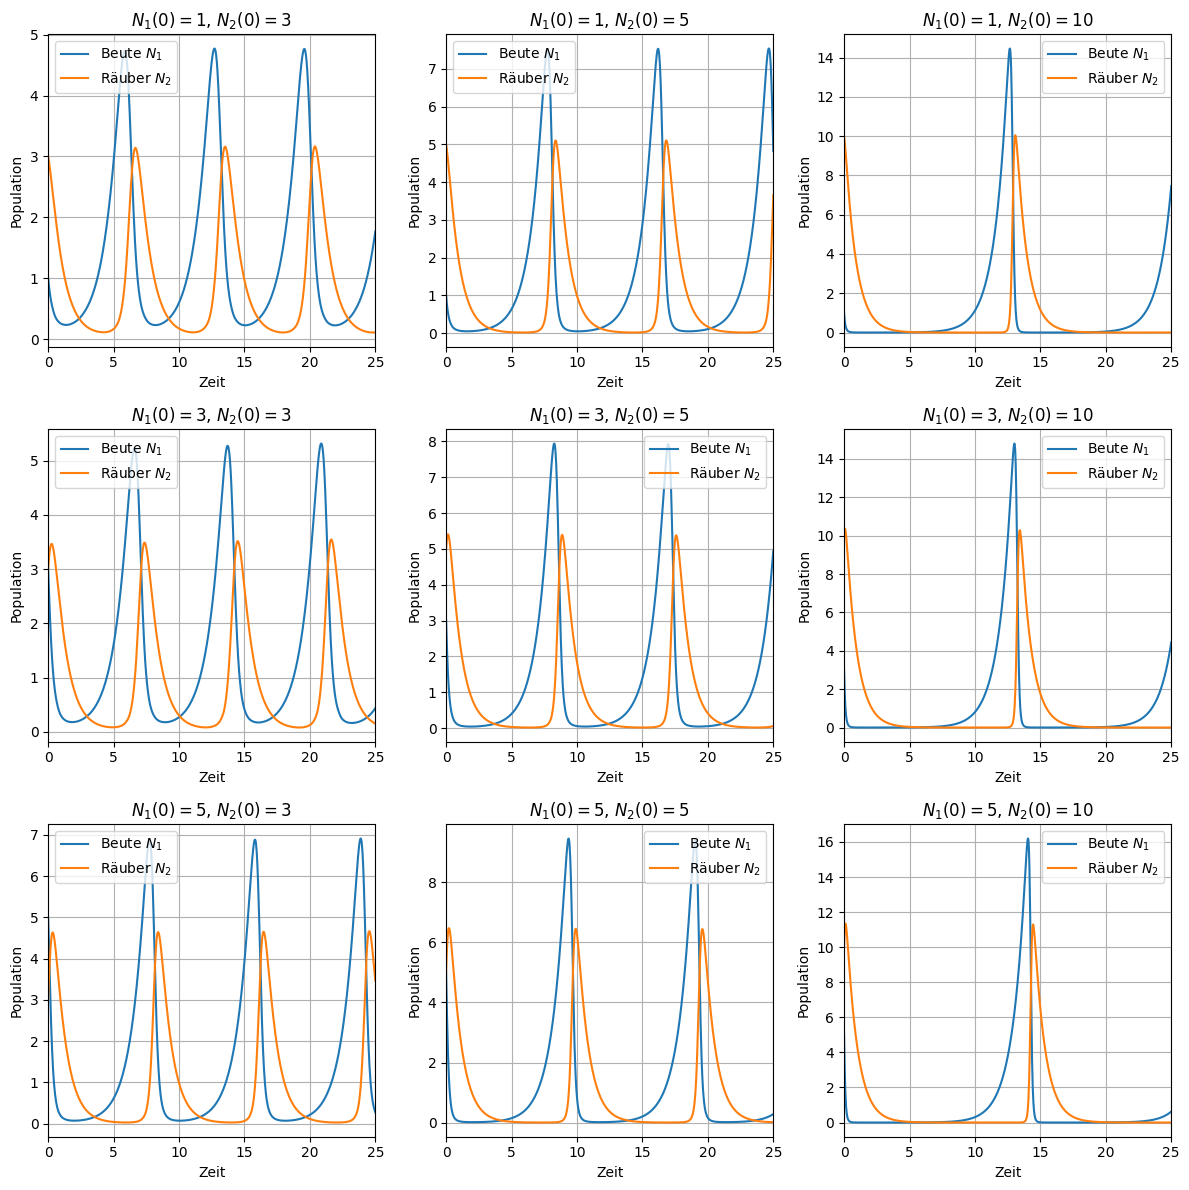

In [11]:
N1_0s = (1, 3, 5)
N2_0s = (3, 5, 10)

t = np.linspace(0, 25, 1000)
t_span = (t.min(), t.max())

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, N1_0 in enumerate(N1_0s):
    for j, N2_0 in enumerate(N2_0s):
        sol = solve_ivp(
            lotka_volterra,
            t_span,
            y0=(N1_0, N2_0),
            args=(a, b, c, d),
            t_eval=t,
        )
        ax = axes[i, j]
        ax.plot(t, sol.y.T, label=("Beute $N_1$", "Räuber $N_2$"))
        ax.set_xlim(t_span)
        ax.set_xlabel("Zeit")
        ax.set_ylabel("Population")
        ax.set_title(f"$N_1(0)={N1_0}$, $N_2(0)={N2_0}$")
        ax.legend()
        ax.grid()

plt.tight_layout()
plt.show()


### Optinonal: Aufgabe 4: Abfluss

Wir betrachten ein aus der Physik bekanntes Problem und zwar den Abfluss von Flüssigkeit aus einem Topf mit einem Loch am Boden. Die Durchmesser des Topfs ist $d_\text{Topf}$ und der des Lochs ist $d_\text{Loch}$. Die Füllhöhe des Topfs zur Zeit $t$ ist $h(t)$. Die Flüssigkeit fliesst mit einer momentanen Geschwindigkeit $v(t)$ ab. 



Uns interessiert dabei, wie sich die Wasserhöhe $h$ im Laufe der Zeit $t$ verändert, und wie die Ausströmgeschwindigkeit $v$ vom Wasserstand $h$ anhängt. Die Systemgrenzen sind durch das Gefäss, das Wasser und die Wirkung der Schwerkraft definiert. Andere Einflüsse wie z.B. die Wärmeleitung werden vernachlässigt.

Eine Erklärung findet sich in dem Artikel von Wikipedia:
- ["Ausflussgeschwindigkeit" - Wikipedia](https://de.wikipedia.org/wiki/Ausflussgeschwindigkeit)

Folgende Zusammenhänge sind bekannt:

- Konstanter Querschnittsfläche des Lochs: $A_\text{Loch} = \frac{\pi}{4} d_\text{Loch}^2$
- Konstante Grundfläche des Topfs: $A_\text{Topf} = \frac{\pi}{4} d_\text{Topf}^2$
- Füllhöhe im Topf zur Zeit $t$: $h(t)$
- Wasservolumen zur Zeit $t$: $V(t) = A_\text{Topf} \cdot h(t)$

Wir nehmen an, dass die Flüssigkeit inkompressibel ist. Dann muss der Volumenstrum ($\frac{dV}{dt}$, der Fluss) aus dem Topf gleich dem Volumenstrom durch das Loch sein:

$$
\frac{dV}{dt} = v_\text{Topf} A_\text{Topf} = v_\text{Loch} A_\text{Loch}
\quad\Rightarrow\quad
v_\text{Topf} = \frac{A_\text{Loch}}{A_\text{Topf}} v_\text{Loch}
$$

Hier ist $v_\text{Loch}$ die Ausflussgeschwindigkeit und $v_\text{Topf}$ die Absenkgeschwindigkeit des Wassers im Topf. Die Absenkgeschwindigkeit entspricht der negativen Änderungsrate der Füllhöhe $h$ (je grösser die Geschwindigkeit, desto schneller sinkt das Wasser):

$$ v_\text{Topf} = - \frac{dh}{dt} $$

Eine vereinfachte Beschreibung der Ausflussgeschwindigkeit $v_\text{Loch}$ in Abhängigkeit von der Füllhöhe $h$ ergibt sich aus der Bernoullischen Energiegleichung für den Fall, dass der Ausflussdurchmesser viel kleiner ist als der Behälterdurchmesser (siehe [Toricelli-Gleichung](https://www.leifiphysik.de/mechanik/stroemungslehre/grundwissen/torricelli-gleichung)):

$$ v_\text{Loch} = \sqrt{2gh}$$

Zusammen erhalten wir

$$ \frac{dh}{dt} = - \frac{A_\text{Loch}}{A_\text{Topf}} \sqrt{2gh} $$

Bekannte Parameter sind:

- $g = 9.81\,\text{m}/\text{s}^2$
- $d_\text{Topf} = 12.25\,\text{cm}$
- $d_\text{Loch} = 0.46\,\text{cm}$
- $h_0 = 21.5\,\text{cm}$

In [12]:
g = 9.81  # m/s^2
d_topf = 0.1225  # m
d_loch = 0.0046  # m
h_0 = 0.215  # m

A_loch = np.pi / 4 * d_loch**2  # m^2
A_topf = np.pi / 4 * d_topf**2  # m^2


#### a) Ableitungsfunktion definieren

Schreibe eine Funktion `dgl(t, h, A_topf, A_loch)`, welche $\frac{dh}{dt}$ zurückgibt. 

In [13]:
# Funktion für das DGL-System
def dgl(t, h, A_topf, A_loch):
    if h <= 0:
        return 0
    else:
        return -(A_loch / A_topf) * np.sqrt(2 * g * h)


#### b) Differentialgleichung numerisch lösen und darstellen

Löse die Differentialgleichung mit Hilfe von `scipy.integrate.solve_ivp` und plotte die Lösung für die Zeit $t \in [0, 120]$.

Die beiden zusätzlichen Parameter `A_topf` und `A_loch` der Funktion `dgl(t, h, A_topf, A_loch)` müssen mit `args=(A_topf, A_loch)` an `solve_ivp` übergeben werden. Also etwa so:

```
    solve_ivp(f, tspan, y0, args=(A_topf, A_loch), ...)
```

Schau mal was passiert, wenn du den Parameter `A_loch` veränderst.

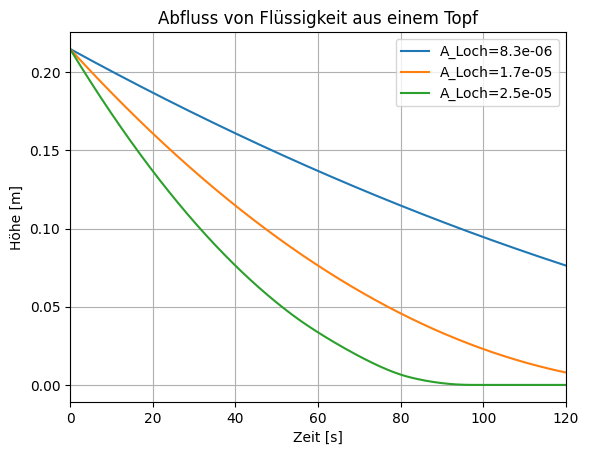

In [14]:
t = np.linspace(0, 120, 1000)
t_span = [t.min(), t.max()]
y0 = [h_0]

for a in (0.5, 1, 1.5):
    sol = solve_ivp(dgl, t_span, y0, t_eval=t, args=(A_topf, A_loch * a))
    h = sol.y[0]
    plt.plot(t, h, label=f"A_Loch={A_loch * a:.1e}")

plt.xlabel("Zeit [s]")
plt.ylabel("Höhe [m]")
plt.title("Abfluss von Flüssigkeit aus einem Topf")
plt.xlim(t.min(), t.max())
plt.legend()
plt.grid()
plt.show()
